In [2]:
%load_ext autoreload

In [3]:
%autoreload 2
import time
import numpy as np
import matplotlib.pyplot as plt


In [11]:
lamda = 56.0 #wavelength (mm)
n_img = 100
n_shp = 300
velocity = 4 #mm/y
velocity_fading = 50 #mm/y
tmp_bl = 6 #days

vel_phase = velocity/365*4*np.pi/lamda    #0.0024 # rad/day
decorr_days = 50

vel_fading = velocity_fading/365*4*np.pi/lamda  # 0.031 # rad/day
decorr_days_fading = 11

gamma0 = 0.6
gammaf_decor = 0
gammaf_cor = 0.1
gamma_fading = 0.18

temp_baseline = np.ogrid[0:(tmp_bl * n_img):tmp_bl]
phas = -vel_phase * temp_baseline

out_dir = './out_figures'

In [5]:
rmsemat_est = np.load('./simulation/rmsemat_modifiedSignalEq_linear.npy')
rmsemat_est_nof = np.load('./simulation_nof/rmsemat_modifiedSignalEq_linear.npy')

rmsemat_s_est = np.load('./simulation/rmsemat_modifiedSignalEq_linear_seasonal.npy')
rmsemat_s_est_nof = np.load('./simulation_nof/rmsemat_modifiedSignalEq_linear_seasonal.npy')

In [6]:
# long term coherent 'CED', 'EMI', 'PTA', 'Seq CED', 'Seq EMI', 'Seq PTA', 'SBW','With fading signal'
print('CED', 'EMI', 'PTA', 'Seq CED', 'Seq EMI', 'Seq PTA', 'SBW','With fading signal')
print('mean: ', np.mean((rmsemat_est[:,1::2] - rmsemat_est_nof[:,1::2]), axis=0))
print('std: ', np.std((rmsemat_est[:,1::2] - rmsemat_est_nof[:,1::2]), axis=0))



CED EMI PTA Seq CED Seq EMI Seq PTA SBW With fading signal
mean:  [0.00540015 0.00957061 0.01768141 0.01419504 0.03978173 0.04148615
 0.55523204]
std:  [0.00448673 0.00419438 0.00542512 0.00912604 0.02071164 0.02066552
 0.34733651]


In [7]:
import pandas as pd
# LTC: Long term coherent
# LTD: Long ter decorrelated
# LS: Light seasonal decorrelation
# SS: Srong seasonal decorrelation

list1 = ['CED', 'EMI', 'PTA', 'Seq CED', 'Seq EMI', 'Seq PTA', 'SBW','With fading signal']
list2 = list(np.mean((rmsemat_est[:,1::2] - rmsemat_est_nof[:,1::2]), axis=0))
list3 = list(np.std((rmsemat_est[:,1::2] - rmsemat_est_nof[:,1::2]), axis=0))
list4 = list(np.mean((rmsemat_est[:,0::2] - rmsemat_est_nof[:,0::2]), axis=0))
list5 = list(np.std((rmsemat_est[:,0::2] - rmsemat_est_nof[:,0::2]), axis=0))

list6 = list(np.mean((rmsemat_s_est[:,1::2] - rmsemat_s_est_nof[:,1::2]), axis=0))
list7 = list(np.std((rmsemat_s_est[:,1::2] - rmsemat_s_est_nof[:,1::2]), axis=0))
list8 = list(np.mean((rmsemat_s_est[:,0::2] - rmsemat_s_est_nof[:,0::2]), axis=0))
list9 = list(np.std((rmsemat_s_est[:,0::2] - rmsemat_s_est_nof[:,0::2]), axis=0))

df = pd.DataFrame(list(zip(list1, list2, list3, list4, list5, list6, list7, list8, list9)), 
                  columns =['name','mean_LTC', 'std_LTC', 'mean_LTD', 'std_LTD', 
                            'mean_LS', 'std_LS', 'mean_SS', 'std_SS'])
df

,name,mean_LTC,std_LTC,mean_LTD,std_LTD,mean_LS,std_LS,mean_SS,std_SS
0,CED,0.005400,0.004487,0.057826,0.031402,-0.000130,0.002573,0.000190,0.020635
1,EMI,0.009571,0.004194,0.069575,0.031154,0.004871,0.003197,0.007138,0.022807
2,PTA,0.017681,0.005425,0.069811,0.031185,0.004755,0.003767,0.012014,0.021835
3,Seq CED,0.014195,0.009126,0.048030,0.030477,0.005188,0.003607,0.029427,0.057618
4,Seq EMI,0.039782,0.020712,0.118453,0.064283,0.013080,0.007356,0.051707,0.072129
5,Seq PTA,0.041486,0.020666,0.119794,0.064083,0.013743,0.007445,0.052111,0.071974
6,SBW,0.555232,0.347337,0.432043,0.260544,-0.063531,0.066453,0.027930,0.058915


In [8]:
# LTC: Long term coherent
# LTD: Long ter decorrelated
# LS: Light seasonal decorrelation
# SS: Srong seasonal decorrelation

list1 = ['CED', 'EMI', 'PTA', 'Seq CED', 'Seq EMI', 'Seq PTA', 'SBW','With fading signal']
list2 = list(np.mean((rmsemat_est_nof[:,1::2]), axis=0))
list3 = list(np.std((rmsemat_est_nof[:,1::2]), axis=0))
list4 = list(np.mean((rmsemat_est_nof[:,0::2]), axis=0))
list5 = list(np.std((rmsemat_est_nof[:,0::2]), axis=0))

list6 = list(np.mean((rmsemat_s_est_nof[:,1::2]), axis=0))
list7 = list(np.std((rmsemat_s_est_nof[:,1::2]), axis=0))
list8 = list(np.mean((rmsemat_s_est_nof[:,0::2]), axis=0))
list9 = list(np.std((rmsemat_s_est_nof[:,0::2]), axis=0))

df = pd.DataFrame(list(zip(list1, list2, list3, list4, list5, list6, list7, list8, list9)), 
                  columns =['name','mean_LTC', 'std_LTC', 'mean_LTD', 'std_LTD', 
                            'mean_LS', 'std_LS', 'mean_SS', 'std_SS'])
df

,name,mean_LTC,std_LTC,mean_LTD,std_LTD,mean_LS,std_LS,mean_SS,std_SS
0,CED,0.166864,0.022609,1.067320,0.292363,0.091441,0.018923,0.416275,0.515139
1,EMI,0.151324,0.026843,1.092226,0.387783,0.087572,0.019846,0.392368,0.478996
2,PTA,0.170726,0.025503,1.096626,0.388113,0.116517,0.018081,0.404126,0.473349
3,Seq CED,0.130677,0.026194,0.331956,0.150033,0.080438,0.018286,0.340103,0.413099
4,Seq EMI,0.127022,0.026103,0.328540,0.154115,0.079381,0.017958,0.280501,0.282124
5,Seq PTA,0.127149,0.026049,0.328793,0.153948,0.079775,0.017915,0.280776,0.282002
6,SBW,0.214452,0.061901,0.523633,0.112641,1.496752,0.338172,1.610720,0.324612


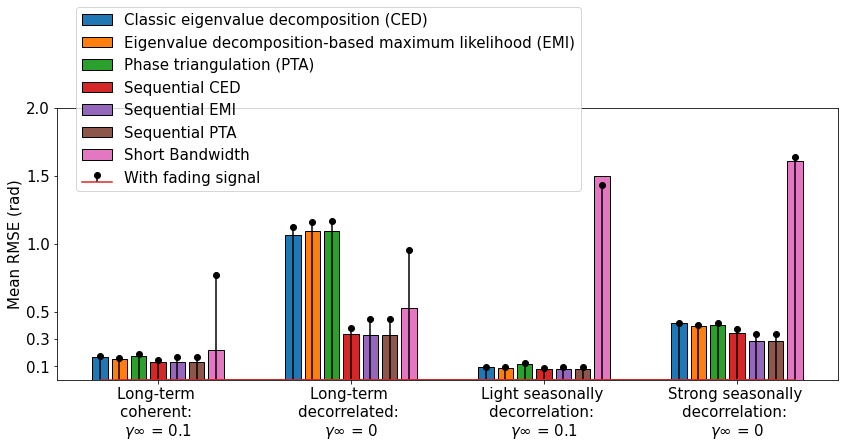

In [12]:
plt.rcParams["font.size"] = "15"

fig, ax = plt.subplots(figsize=(14, 5))

exp_nof_1 = np.mean(rmsemat_est_nof[:,1::2], axis=0)
exp_nof_2 = np.mean(rmsemat_est_nof[:,0::2], axis=0)
s_nof_1 = np.mean(rmsemat_s_est_nof[:,1::2], axis=0)
s_nof_2 = np.mean(rmsemat_s_est_nof[:,0::2], axis=0)

exp_1 = np.mean(rmsemat_est[:,1::2], axis=0)
exp_2 = np.mean(rmsemat_est[:,0::2], axis=0)
s_1 = np.mean(rmsemat_s_est[:,1::2], axis=0)
s_2 = np.mean(rmsemat_s_est[:,0::2], axis=0)

for i in range(7):
    ax.bar([0+i, 10+i, 20+i, 30+i], [exp_nof_1[i], exp_nof_2[i], s_nof_1[i], s_nof_2[i]], edgecolor='black')

for i in range(7):
    ax.stem([0+i, 10+i, 20+i, 30+i], [exp_1[i], exp_2[i], s_1[i], s_2[i]], markerfmt='ko', linefmt='k-')


ax.legend(('Classic eigenvalue decomposition (CED)', 
          'Eigenvalue decomposition-based maximum likelihood (EMI)',
          'Phase triangulation (PTA)', 
          'Sequential CED',
          'Sequential EMI',
          'Sequential PTA',
          'Short Bandwidth',
          'With fading signal'
          ),bbox_to_anchor=(0.68, 1.4), loc=1)



labels = ['Long-term \ncoherent: \n$\gamma$'+u"\u221e = 0.1",
         'Long-term \ndecorrelated: \n$\gamma$'+u"\u221e = 0",
         'Light seasonally \ndecorrelation: \n$\gamma$'+u"\u221e = 0.1",
         'Strong seasonally \ndecorrelation: \n$\gamma$'+u"\u221e = 0"]

ax.set_xticks([3, 13, 23, 33])
ax.set_yticks([ 0.1, 0.3, 0.5, 1.0, 1.5, 2.0])
ax.set_xticklabels(labels)
ax.set_ylabel('Mean RMSE (rad)')

fig.subplots_adjust(hspace=0,wspace=0.1)
plt.savefig(out_dir + '/assessment_new2.png', bbox_inches='tight', transparent=True)
plt.show()

